In [11]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Output File (CSV)
output_data_file = "output_data/tweetskchw.csv"

In [12]:
# Target Search Term
user_id = ["@CNNbrk", "@BBCBreaking", "@CBSNews", "@FoxNews", "@nytimes"]
results_list = []

# BBC, CBS, CNN, Fox, and New York times.
for user in user_id:
    counter = 1
    for item in tweepy.Cursor(api.user_timeline, id = user).items(100):
        tweet = json.dumps(item._json, indent = 3)
        tweet = json.loads(tweet)
        text = tweet["text"]
            
    # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        positive = analyzer.polarity_scores(tweet["text"])["pos"]
        neutral = analyzer.polarity_scores(tweet["text"])["neu"]
        negative = analyzer.polarity_scores(tweet["text"])["neg"]

        user_results = {"Username": user, "Date Created": tweet["created_at"],
                        "Tweet Count": counter, "Compound Score": compound,
                        "Positive Score": positive, "Neutral Score": neutral, "Negative Score": negative, "Text": text}
        
        results_list.append(user_results)
        
        counter += 1

In [13]:
results_df = pd.DataFrame.from_dict(results_list)
results_df.head()

,Compound Score,Date Created,Negative Score,Neutral Score,Positive Score,Text,Tweet Count,Username
0,0.5574,Thu Oct 04 23:30:55 +0000 2018,0.000,0.841,0.159,A cloture vote for Supreme Court nominee Brett...,1,@CNNbrk
1,-0.6124,Thu Oct 04 23:04:54 +0000 2018,0.250,0.750,0.000,Capitol Police arrested 302 protesters during ...,2,@CNNbrk
2,-0.6808,Thu Oct 04 22:05:42 +0000 2018,0.381,0.485,0.134,Two protesters opposed to Brett Kavanaugh's Su...,3,@CNNbrk
3,-0.6808,Thu Oct 04 17:21:50 +0000 2018,0.280,0.720,0.000,"Nineties rap mogul Marion ""Suge"" Knight is sen...",4,@CNNbrk
4,0.0258,Thu Oct 04 13:58:17 +0000 2018,0.181,0.679,0.140,Seven Russian intelligence officers are charge...,5,@CNNbrk


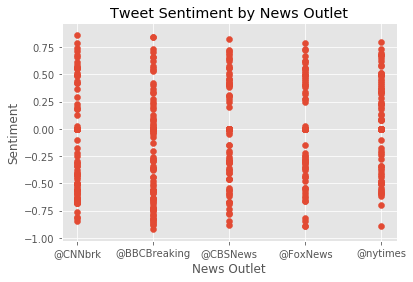

In [20]:
#sns.lmplot(x="Username", y="created_at", data=compound)
# Build a scatter plot for each data type
plt.scatter(results_df["Username"], results_df["Compound Score"], marker="o")

# Incorporate the other graph properties
plt.title("Tweet Sentiment by News Outlet")
plt.ylabel("Sentiment")
plt.xlabel("News Outlet")
plt.grid(True)

# Save the figure
plt.savefig("TweetSentiment.png")

# Show plot
plt.show()

In [ ]:
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")